In [92]:
# Librerías para el manejo y análisis de datos 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.colors as colors
import matplotlib.cm as cm
import plotly.io as pio
from plotly.subplots import make_subplots
from plotly.subplots import make_subplots
from scipy.stats import pearsonr
from mpl_toolkits.mplot3d import Axes3D

In [93]:
data=pd.read_excel(r'./data/measurements2.xlsx')


In [94]:
x = df.iloc[:,[0,2,3,4,5,6,7,8,9]]
y = df.iloc[:,1]

In [95]:
#  buscar y reemplazar datos NaN por 0
x.loc[:,['specials']] = x.loc[:,['specials']].fillna(' ')

/var/folders/sw/ywfjlc8d22902gxr8wwrsfnw0000gn/T/ipykernel_79475/2901902821.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



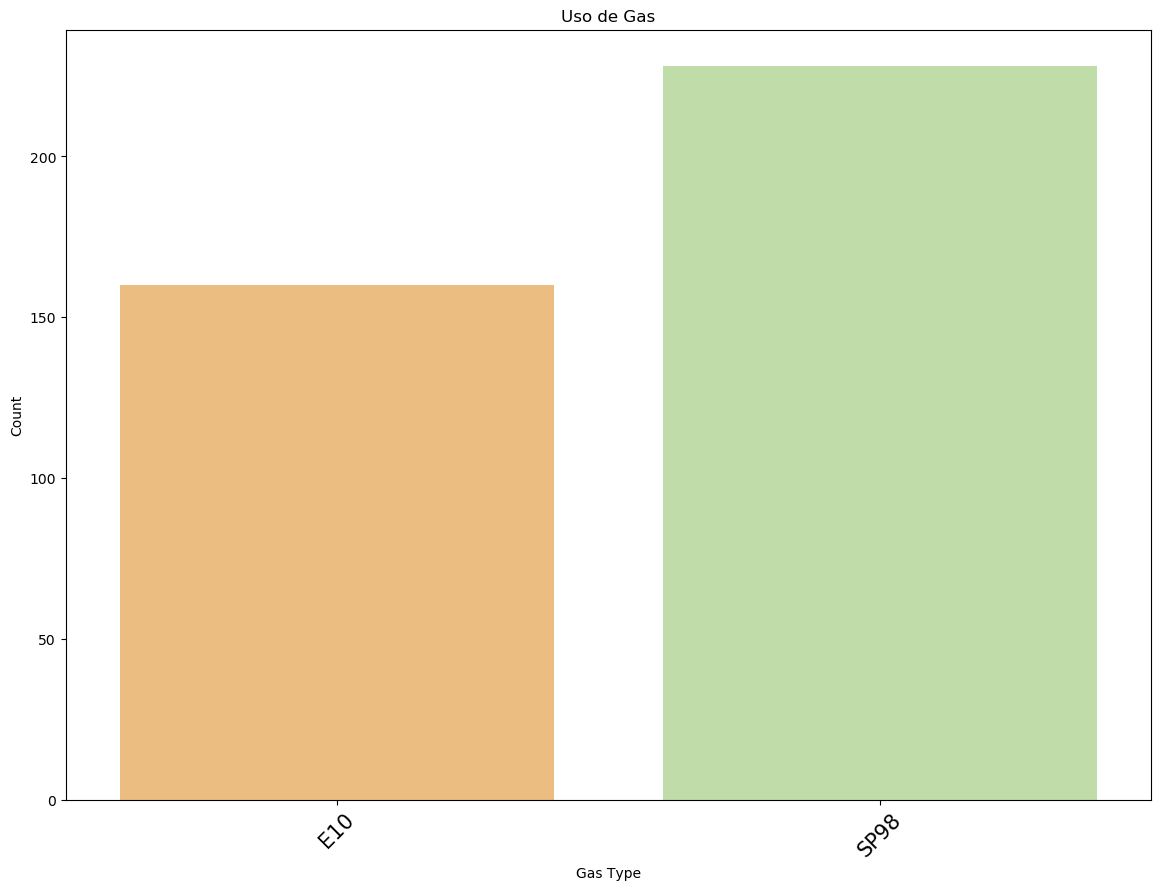

In [96]:
# Gas 
used_gas = data.groupby('gas_type').size().reset_index(name='n')

plt.figure(figsize=(14, 10))
sns.barplot(data=used_gas, x='gas_type', y='n', palette='Spectral')
plt.xticks(rotation=45, size=15)
plt.xlabel('Gas Type')
plt.ylabel('Count')
plt.title('Uso de Gas')

plt.show()


In [97]:
# visualización interactiva con Plotly:
fig = px.bar(used_gas, x='gas_type', y='n', color='n',
             color_continuous_scale='Spectral',
             title='Uso de Gas')
fig.show()

In [98]:
# Más casos de uso de gas SP98 que de E10
gas_counts = data['gas_type'].value_counts()
if gas_counts['SP98'] > gas_counts['E10']:
    print("Hay más casos de uso de gas SP98 que de E10.")
else:
    print("Hay más casos de uso de gas E10 que de SP98.")

Hay más casos de uso de gas SP98 que de E10.


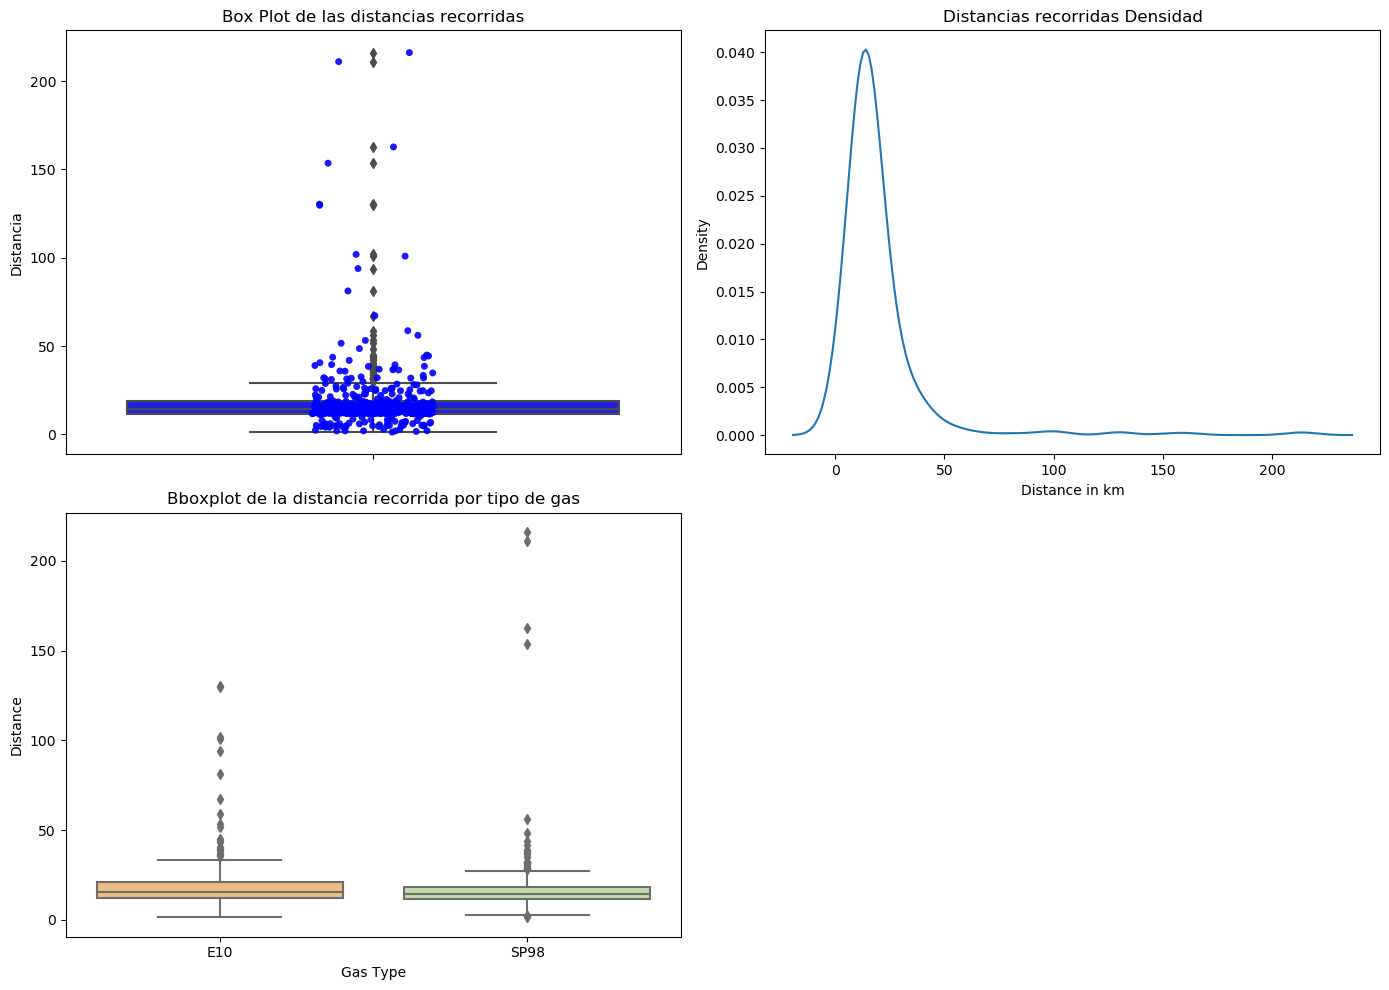

In [99]:
# Distancias
plt.figure(figsize=(14, 10))
plt.subplot(2, 2, 1)
sns.boxplot(data=data, y="distance", color="blue")
sns.stripplot(data=data, y="distance", color="blue", alpha=0.9, jitter=True)
plt.ylabel("Distancia")
plt.title("Box Plot de las distancias recorridas")

plt.subplot(2, 2, 2)
sns.kdeplot(data=data, x="distance")
plt.xlabel("Distance in km")
plt.title("Distancias recorridas Densidad")

plt.subplot(2, 2, 3)
sns.boxplot(data=data, x="gas_type", y="distance", palette="Spectral")
plt.xlabel("Gas Type")
plt.ylabel("Distance")
plt.title("Bboxplot de la distancia recorrida por tipo de gas")

plt.tight_layout()
plt.show()

In [100]:
# visualizaciones interactivas con Plotly:
fig_distance_boxplot = px.box(data, y="distance", color_discrete_sequence=["blue"])
fig_distance_boxplot.add_trace(px.strip(data, y="distance", color_discrete_sequence=["blue"]).data[0])
fig_distance_boxplot.update_layout(title="Box Plot de las distancias recorridas")
fig_distance_boxplot.show()

fig_distance_density = px.histogram(data, x="distance", marginal="rug", nbins=30)
fig_distance_density.update_layout(title="Distancias recorridas Densidad")
fig_distance_density.show()

fig_distance_by_gas = px.box(data, x="gas_type", y="distance", color="gas_type")
fig_distance_by_gas.update_layout(title="Gráfico de caja de la distancia recorrida por tipo de gas")
fig_distance_by_gas.show()

In [101]:
'''La **distancia media recorrida es de 18,76 km.** La **distancia media** recorrida cuando se utiliza **E10 (14,15 km)** es mayor que cuando se utiliza **SP98 (11,60 km)**.
'''

'La **distancia media recorrida es de 18,76 km.** La **distancia media** recorrida cuando se utiliza **E10 (14,15 km)** es mayor que cuando se utiliza **SP98 (11,60 km)**.\n'

In [102]:
# Box Plot del Consumo de Gasolina en general
fig_consume_boxplot = px.box(data, y="consume")
fig_consume_boxplot.update_traces(marker_color="blue", jitter=0.3, marker=dict(size=5))
fig_consume_boxplot.update_layout(title="Box Plot del Consumo de Gasolina en general")
fig_consume_boxplot.show()

In [103]:
# Densidad del Consumo de Gasolina en general
fig_consume_density = px.histogram(data, x="consume", nbins=30, marginal="rug")
fig_consume_density.update_layout(title="Densidad del Consumo de Gasolina en general")
fig_consume_density.show()

In [104]:
# Resumen del Consumo de Gasolina
summary_consume = data["consume"].describe()
print(summary_consume)

count    388.000000
mean       4.912371
std        1.033172
min        3.300000
25%        4.300000
50%        4.700000
75%        5.300000
max       12.200000
Name: consume, dtype: float64


In [105]:
# Boxplot del Consumo de Gasolina por Tipo de Gasolina
fig_consume_by_gas = px.box(data, x="gas_type", y="consume", color="gas_type", color_discrete_sequence=px.colors.qualitative.Dark2)
fig_consume_by_gas.update_layout(title="Boxplot del Consumo de Gasolina por Tipo de Gasolina")
fig_consume_by_gas.show()

In [108]:
# Interacción entre AC y Lluvia en el Consumo de Gasolina
data["rain"] = data["rain"].astype("category")
data["AC"] = data["AC"].astype("category")

fig_interaction_check = make_subplots(rows=1, cols=2)

In [111]:
'''ArithmeticError# Gráfico de Interacción AC y Lluvia 1
fig_interaction_check.add_trace(go.scatter(data, x="AC", y="consume", color="rain"), row=1, col=1)
fig_interaction_check.update_xaxes(title_text="AC", row=1, col=1)
fig_interaction_check.update_yaxes(title_text="Consumo de Gasolina", row=1, col=1)


SyntaxError: EOF while scanning triple-quoted string literal (2093558415.py, line 4)